# bug_bear_libby; a numerical discovery.
### figure of a bug? or bug of a figure?

    Sequential iteration of difference equation:
    Z = 1/Z - Z^( n*Z^(p(n)^n )/k);
    with parameter set:
    p = [-0.851612290000, -1.794358160000, -4.450415130000]
    on the complex plane produces a bug like figure.

#### Display images in separate window
    from PIL import Image as PIL_Image
    im = PIL_Image.open('Celeste.png')
    im.show()

In [1]:
from IPython.display import SVG
from IPython.display import Image
from IPython.display import display
# image_file_list = ['Celeste_HEAD.png', 'Celeste.png', 'Celeste_Thorax.png']
# image_list = []
# for imfile in image_file_list:
#     image_list.append(Image(filename=imfile))
# display(*image_list)

In [2]:
%matplotlib inline
import matplotlib;              import matplotlib.pyplot as plt
import matplotlib.image as ip

In [3]:
import os;                      import sys             
import numpy as np;             import time
sys.path.insert(1, '../src');   import z_plane as zp
import graphic_utility as gu;   import itergataters as ig

In [4]:
def bug_bear_libby_44(Z0, p, ETM, ETB):
    """ Zf, ET = bug_bear_libby(Z0, p, ETM, ETB); # Baseline timing == Dog Slow
    """
    Zf = Z0.copy();             k = np.sqrt(np.pi);
    ET = np.zeros(Z0.shape, dtype='int32')
    for r in range(0, Z0.shape[0]):
        for c in range(0, Z0.shape[1]):
            Z = Z0[r, c];       Zrc = Z
            while (np.isfinite(Z)) & (abs(Zrc - Z) < ETB) & (ET[r, c] < ETM):
                Zt = Z;         ET[r, c] += 1
                try:
                    for n in range(1, len(p)+1):
                        Z = 1 / Z - Z**( n * (Z**( p[n-1]**n )) / k)
                except:
                    pass
                if np.isfinite(Z):  Zt = Z
            Zf[r, c] = Zt
    return Zf, ET

In [5]:
def Julia_set(Z, P):
    Z = Z**P[0] - P[1]
    return Z

In [6]:
js_dict = { 'iconic': complex(0.7757, 0.1234), 
            'spirals': complex(0.7513, 0.2551), 
            'ropey': complex(0.81, 0.2025), 
            'separable': complex(0.7958, 0.1893)}

In [7]:
t0 = time.time()
par_set = {'n_rows': 200, 'n_cols': 200}
par_set['center_point'] = 0.0
par_set['theta'] = np.pi / 4
par_set['zoom'] = 3/4        # larger magnifies (zoom - in), smaller shrinks (zoom - out)
par_set['it_max'] = 512
par_set['max_d'] = 32 / par_set['zoom']
par_set['dir_path'] = os.getcwd()
#par_set['tmp_dir'] = zu.get_tmp_dir(par_set['dir_path'], 'tmp')

list_tuple = [(Julia_set, (2, js_dict['ropey']))]


# Iet = zu.ET_as_grayscale(ET);          Iet.show()
# I = zu.Z_ET_to_show(Z, ET);            I.show()
print('Run time = %0.03f'%(time.time() - t0))

Run time = 0.783


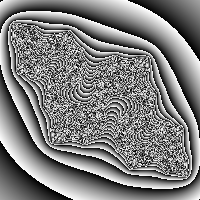

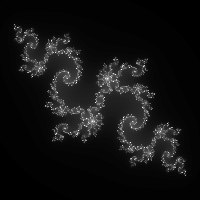

In [8]:
Mz = gu.mat2graphic(Z)
display(gu.mat_to_gray(Mz))
M_et = gu.mat2graphic(ET)
display(gu.mat_to_gray(M_et))

In [18]:
CP = -20.0 + 0.0*1j;              ZM = 0.035;           theta = -1 * np.pi/2;
cp_obj = zp.ComplexPlane(CP, ZM, theta, h=300, w=300)
Z0 = cp_obj.get_complex_pixels()

p = [-0.851612290000, -1.794358160000, -4.450415130000]
ETM = 256;                      ETB = 133;

In [11]:
def bugga_bear(Z, p):
    EPSILON = 1e-15
    for n in range(1, len(p)+1):
        if np.abs(Z) != 0:
            Z = 1 / Z - Z**( n * (Z**( p[n-1]**n )) / np.sqrt(np.pi))
        else:
            Z = 1 / EPSILON - Z**( n * (Z**( p[n-1]**n )) / np.sqrt(np.pi))
    return Z

/Users/mojo/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: RuntimeWarning: overflow encountered in cdouble_scalars
/Users/mojo/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in cdouble_scalars
/Users/mojo/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: RuntimeWarning: overflow encountered in cdouble_scalars
/Users/mojo/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: RuntimeWarning: overflow encountered in cdouble_scalars
/Users/mojo/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: RuntimeWarning: overflow encountered in cdouble_scalars
/Users/mojo/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: RuntimeWarning: overflow encountered in cdouble_scalars
/Users/mojo/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in cdouble_scalars
/Users/mojo/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: Runtim

5.514786958694458 	 total time


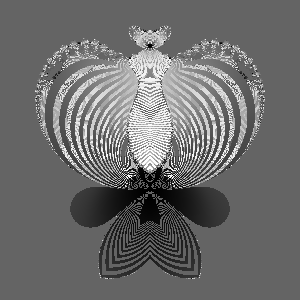

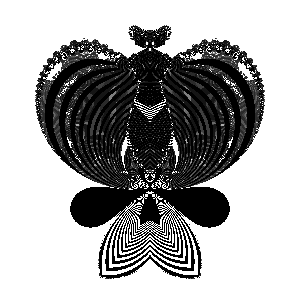

In [17]:
t0 = time.time()

par_set = {'n_rows': 300, 'n_cols': 300}
par_set['center_point'] = -20.0 + 0.0*1j
par_set['theta'] = -1 * np.pi/2
par_set['zoom'] = 0.035
par_set['it_max'] = 16
par_set['max_d'] = 32 / par_set['zoom']
par_set['dir_path'] = os.getcwd()

list_tuple = [(bugga_bear, ([-0.851612290000, -1.794358160000, -4.450415130000]))]
ET, Z, Z0 = ig.get_primitives(list_tuple, par_set)
       
tt = time.time() - t0;      print(tt, '\t total time')

Mz = gu.mat2graphic(Z)
display(gu.mat_to_gray(Mz))
M_et = gu.mat2graphic(ET)
display(gu.mat_to_gray(M_et))

/Users/mojo/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:13: RuntimeWarning: overflow encountered in cdouble_scalars
/Users/mojo/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in cdouble_scalars


145.16961097717285 	 total time


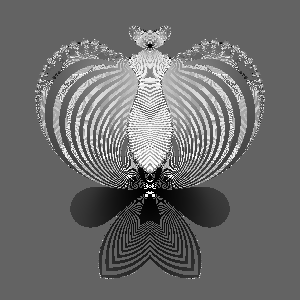

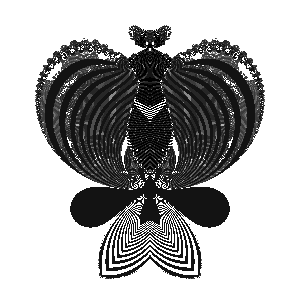

In [19]:
t0 = time.time()
Zf, ET = bug_bear_libby_44(Z0, p, ETM, ETB)
tt = time.time() - t0;          # u0 = plt.imshow(ET)
print(tt, '\t total time')

Mz = gu.mat2graphic(Zf)
display(gu.mat_to_gray(Mz))
M_et = gu.mat2graphic(ET)
display(gu.mat_to_gray(M_et))

In [ ]:
from IPython.display import SVG

In [ ]:
from IPython.display import Javascript
# Javascript("""$.getScript('http://d3js.org/d3.v3.min.js')""")

In [10]:
from IPython.display import Math
Math(r'F(k) = \int_{-\infty}^{\infty} f(x) e^{2\pi i k} dx')

<IPython.core.display.Math object>

In [11]:
from IPython.display import Latex
Latex(r"""\begin{eqnarray}
\nabla \times \vec{\mathbf{B}} -\, \frac1c\, \frac{\partial\vec{\mathbf{E}}}{\partial t} & = \frac{4\pi}{c}\vec{\mathbf{j}} \\
\nabla \cdot \vec{\mathbf{E}} & = 4 \pi \rho \\
\nabla \times \vec{\mathbf{E}}\, +\, \frac1c\, \frac{\partial\vec{\mathbf{B}}}{\partial t} & = \vec{\mathbf{0}} \\
\nabla \cdot \vec{\mathbf{B}} & = 0 
\end{eqnarray}""")

<IPython.core.display.Latex object>